Let's see if we can just do a simple 2-d histogram, display it and then hist it.

In [1]:
# Import modules.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.plots as plots
from lsst.sims.maf.metricBundles import MetricBundle, MetricBundleGroup, makeBundlesDictFromList

In [14]:
sqliteDir = '/Users/yoachim/Scratch/Opsim_sqlites/'
#runName = 'enigma_1189'
runName = 'ops2_1094'
#runName = 'enigma_1258'
opsdb = db.OpsimDatabase(sqliteDir+runName + '_sqlite.db')

In [15]:
fields = opsdb.fetchFieldsFromFieldTable()

In [16]:
sql = 'filter = "g" or filter="r" or filter="i" or filter="z"'
data = opsdb.fetchMetricData(['night','fieldID'], sql)

In [17]:
data['night']

array([   1,    1,    1, ..., 3649, 3649, 3649])

In [18]:
nightBins = np.arange(data['night'].min(), data['night'].max() +2) -0.5
fIDBins = np.arange(data['fieldID'].min(), data['fieldID'].max() +2) -0.5

In [19]:
H,xe,ye = np.histogram2d(data['night'], data['fieldID'], bins=[nightBins,fIDBins])

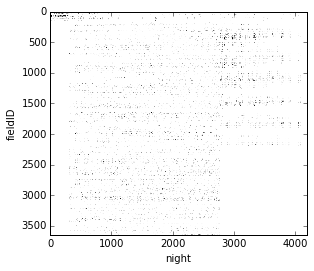

In [20]:
plt.imshow(H, vmin=1, vmax=5, cmap='gray_r')
plt.xlabel('night')
plt.ylabel('fieldID')

In [21]:
bins = np.arange(0.5, H.max()+1.5)

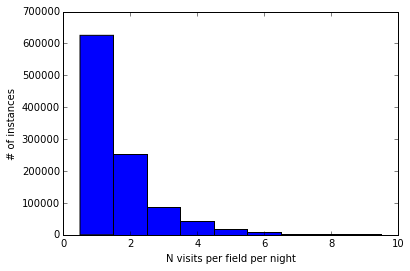

In [22]:
bins = np.arange(0.5, H.max()+2)
finalHist, finalBins, ack = plt.hist(H.ravel(), bins)
plt.xlim([0,10])
plt.xlabel('N visits per field per night')
plt.ylabel('# of instances')

Note:  if there were 200,000 pairs, that implies there _could_ have been 400,000 singles.  Need to multiply by the bin number to get the total number of visits. To illustrate the issue, the sum of H gives the total number of visits, but the sum of the histogram of H does not.

In [23]:
print data.size
print np.sum(H)
print np.sum(finalHist)

1928379
1928379.0
1047888.0


1928379.0


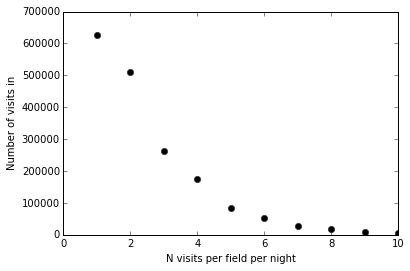

In [24]:
x = np.arange(1,finalHist.size+1)
plt.plot(x, finalHist*x, 'ko')
plt.xlim([0,10])
plt.ylabel('Number of visits in')
plt.xlabel('N visits per field per night')
print np.sum(finalHist*x)

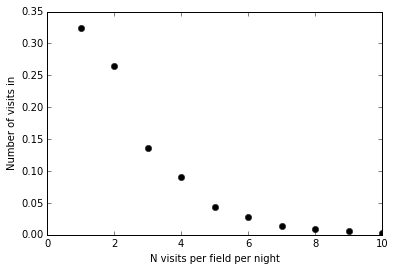

In [25]:
# Same, now normalized
plt.plot(x, finalHist*x/np.sum(H), 'ko')
plt.xlim([0,10])
plt.ylabel('Number of visits in')
plt.xlabel('N visits per field per night')